# K means clustering project

Data: A dataset of mall customers 
Attributes: CustomerID - ID of a customer
            Genre - Gender of a customer
            Age - Age of a customer
            Annual Income(k$) - Annual income of a customer in thousands of dollars
            Spending Score - (1-100) - A score given to a customer based on the amount the customer spends on mall products

Problem : To make sense of the data and provide insights into the customer spending patterns

In [41]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#reading in the datasets
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


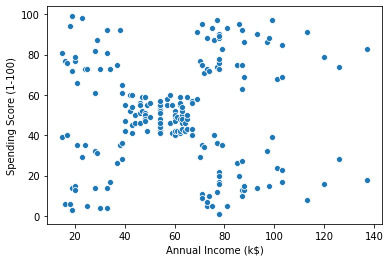

In [12]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = dataset)

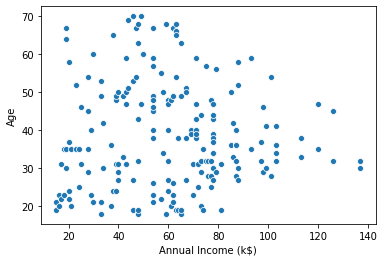

In [13]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Age', data = dataset)

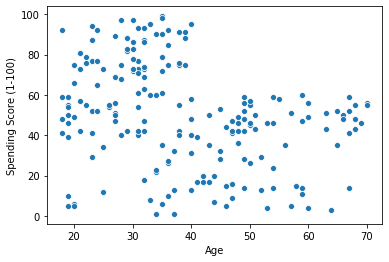

In [14]:
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = dataset)

#### From the scatterplots above it is visually evident that clusters can be formed from the 'Spending Score' vs 'Annual Income'
#### plot and the 'Spending Score' vs 'Age' plot. 
#### The 'Age' vs ' Annual Income' plot does not have prominent clusters and has thus been left out of further examination

In [19]:
X1 = dataset.iloc[:, 3:].values # 'Spending Score' vs 'Annual Income'

In [21]:
X1

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [27]:
X2 = dataset.iloc[:, [2,4]].values # 'Age' vs 'Annual Income'

In [28]:
X2

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

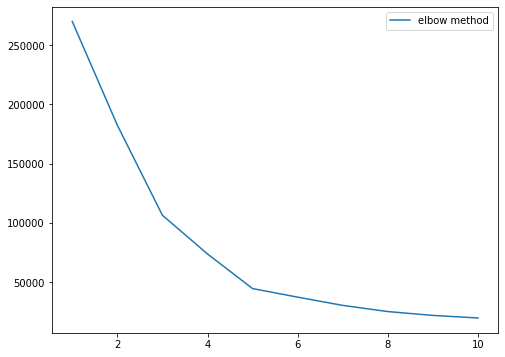

In [61]:
# Plotting the elbow method graph to identify the correct number of clusters
# For "Spending Score" vs "Annual Income"

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=101)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
sns.lineplot(x = range(1,11), y = wcss, label = 'elbow method')

###### From the graph it is evident that the 'elbow' is at k=5. Hence 5 clusters are used 

In [43]:
# Training the dataset and performing predictions on it

kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state=101)
kmeans.fit(X1)
y_pred = kmeans.predict(X1)

In [44]:
y_pred  # prediction results

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

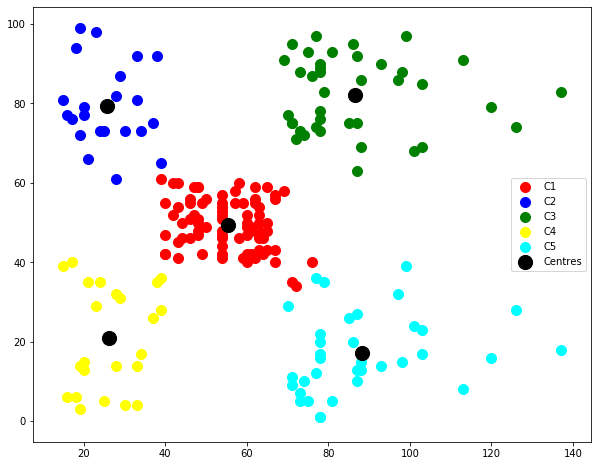

In [49]:
#The clusters are given individual colors and the centroids of respective clusters are shown to aid in inference

plt.figure(figsize=(10,8))
plt.scatter(X1[y_pred==0,0], X1[y_pred==0, 1], s= 100, c = 'red', label = 'C1')
plt.scatter(X1[y_pred==1,0], X1[y_pred==1, 1], s= 100, c = 'blue', label = 'C2')
plt.scatter(X1[y_pred==2,0], X1[y_pred==2, 1], s= 100, c = 'green', label = 'C3')
plt.scatter(X1[y_pred==3,0], X1[y_pred==3, 1], s= 100, c = 'yellow', label = 'C4')
plt.scatter(X1[y_pred==4,0], X1[y_pred==4, 1], s= 100, c = 'cyan', label = 'C5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centres')
plt.legend()

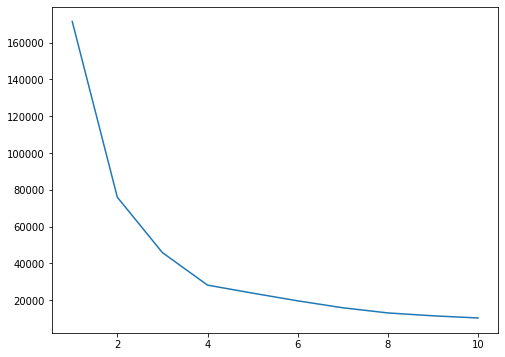

In [52]:
# For 'Age' vs 'Annual Income'

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=101)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss)
plt.show()

##### From the graph it is evident that the 'elbow' is formed at k = 4. Hence 4 clusters are formed

In [53]:
kmeans = KMeans(n_clusters= 4, init = 'k-means++', random_state=101)
kmeans.fit(X2)
y_pred = kmeans.predict(X2)

In [54]:
y_pred

array([3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 3, 2, 0, 3, 0,
       2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 3,
       2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 1, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

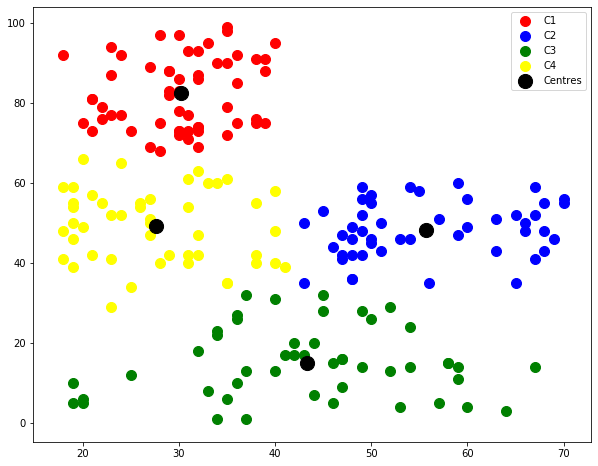

In [55]:
#The clusters are given individual colors and the centroids of respective clusters are shown to aid in inference

plt.figure(figsize=(10,8))
plt.scatter(X2[y_pred==0,0], X2[y_pred==0, 1], s= 100, c = 'red', label = 'C1')
plt.scatter(X2[y_pred==1,0], X2[y_pred==1, 1], s= 100, c = 'blue', label = 'C2')
plt.scatter(X2[y_pred==2,0], X2[y_pred==2, 1], s= 100, c = 'green', label = 'C3')
plt.scatter(X2[y_pred==3,0], X2[y_pred==3, 1], s= 100, c = 'yellow', label = 'C4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centres')
plt.legend()

## THE END